# 1.Import all necessary library 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly_express as px 
import re 
from textblob import TextBlob 
from wordcloud import WordCloud
import random
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression,RidgeClassifier,RidgeClassifierCV,PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,OneClassSVM
from sklearn.multiclass import OutputCodeClassifier,OneVsOneClassifier,OneVsRestClassifier
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network,multiclass
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,f1_score,roc_auc_score
import nltk
from sklearn.model_selection import GridSearchCV
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

------------- Reading the Dataset's -------------------

In [6]:
df = pd.read_csv("IMDB_Dataset.csv")
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

---------------- Finding Unique values in Sentiment -------------------

In [9]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

# 2.Data Analysis & Visualization

In [10]:
# Creating a function to get subjectivity 

def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Creating a function to get Polarity 

def Polarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['review'].apply(subjectivity)
df['Polarity'] = df['review'].apply(Polarity)



In [11]:
df.head()

review sentiment  Subjectivity  \
0  One of the other reviewers has mentioned that ...  positive      0.490369   
1  A wonderful little production. <br /><br />The...  positive      0.559343   
2  I thought this was a wonderful way to spend ti...  positive      0.658730   
3  Basically there's a family where a little boy ...  negative      0.454167   
4  Petter Mattei's "Love in the Time of Money" is...  positive      0.452916   

   Polarity  
0  0.023433  
1  0.109722  
2  0.354008  
3 -0.057813  
4  0.217952

In [12]:
px.scatter(df,x ='Polarity',y='Subjectivity')

In [13]:
px.scatter(df,x ='Polarity',y='sentiment')

In [14]:
px.scatter(df,x ='Subjectivity',y='sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

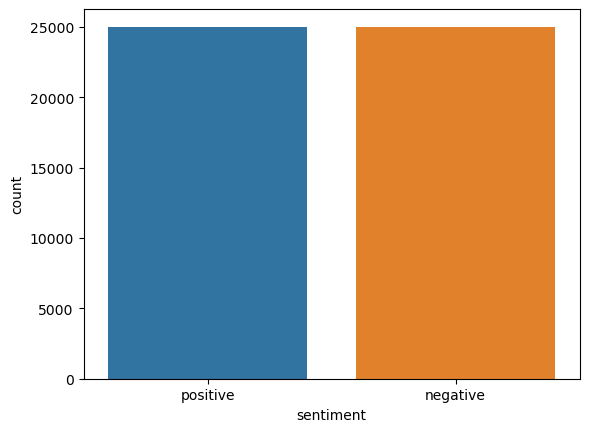

In [15]:
sns.countplot(x=df["sentiment"])


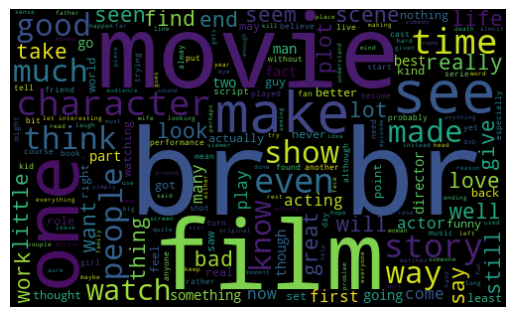

In [16]:
allwords = " ".join( [reve for reve in df['review']])
wordcloud = WordCloud(width=500,height=300,random_state=45,max_font_size=120).generate(allwords)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

--------- Converting Categorical values into Numerical values------------

In [17]:
mapping = {'positive':1 , 'negative':0}
df['sentiment'].replace(mapping,inplace=True)
df['sentiment'].replace(mapping,inplace=True)

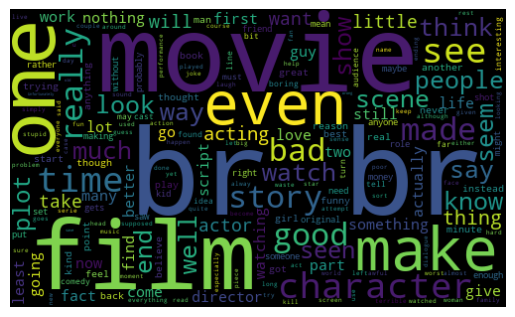

In [18]:
negative_data = df[df.sentiment == 0]['review']
allwords = " ".join( [reve for reve in negative_data])
wordcloud = WordCloud(width=500,height=300,random_state=45,max_font_size=120).generate(allwords)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

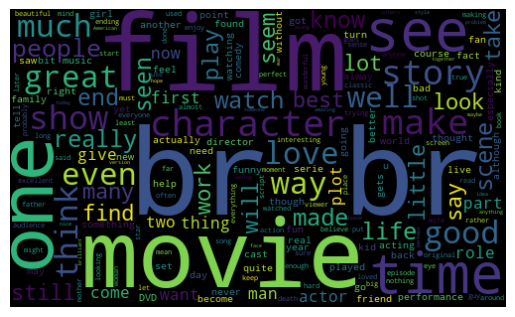

In [19]:
postive_data = df[df.sentiment == 1]['review']
allwords = " ".join( [reve for reve in postive_data])
wordcloud = WordCloud(width=500,height=300,random_state=45,max_font_size=120).generate(allwords)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

# 3. Splitting the dataset's into Training & Testing 

In [20]:
training = df.loc[:39999]
testing = df.loc[40000:50000]

In [21]:
training.head()

review  sentiment  Subjectivity  \
0  One of the other reviewers has mentioned that ...          1      0.490369   
1  A wonderful little production. <br /><br />The...          1      0.559343   
2  I thought this was a wonderful way to spend ti...          1      0.658730   
3  Basically there's a family where a little boy ...          0      0.454167   
4  Petter Mattei's "Love in the Time of Money" is...          1      0.452916   

   Polarity  
0  0.023433  
1  0.109722  
2  0.354008  
3 -0.057813  
4  0.217952

In [22]:
testing.head()

review  sentiment  \
40000  First off I want to say that I lean liberal on...          0   
40001  I was excited to see a sitcom that would hopef...          0   
40002  When you look at the cover and read stuff abou...          0   
40003  Like many others, I counted on the appearance ...          0   
40004  This movie was on t.v the other day, and I did...          0   

       Subjectivity  Polarity  
40000      0.593464 -0.094444  
40001      0.618817  0.044355  
40002      0.523039  0.075490  
40003      0.607189  0.009447  
40004      0.433666  0.207483

In [23]:
print(training.shape)
print(testing.shape)

(40000, 4)
(10000, 4)


# 4.Elimination of Punctuation, URLs, Special Character & Numbers.

In [24]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing special character 
def sp_char(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Removing 
def final(text):
    text = strip_html(text)
    text = remove_brackets(text)
    text  = sp_char(text)
    return text
#Apply function on review column on Training & Testing.
training['review'] = training['review'].apply(final)
testing['review'] = testing['review'].apply(final)

c:\Users\Aai\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

C:\Users\Aai\AppData\Local\Temp\ipykernel_21976\1370849684.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aai\AppData\Local\Temp\ipykernel_21976\1370849684.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 5. Applying Lemmatizition.

In [25]:
def lemm(text):
    lemmatizer = WordNetLemmatizer()
    text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


training['review'] = training['review'].apply(lemm)
testing['review'] = testing['review'].apply(lemm)


C:\Users\Aai\AppData\Local\Temp\ipykernel_21976\2173157936.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aai\AppData\Local\Temp\ipykernel_21976\2173157936.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 6. Converting the word into Lowercase

In [26]:
# Converting the capital letters into lower.
training['review'] = training['review'].str.lower()
testing['review'] = testing['review'].str.lower()

C:\Users\Aai\AppData\Local\Temp\ipykernel_21976\982988372.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aai\AppData\Local\Temp\ipykernel_21976\982988372.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 7.Applying Stopword's

In [27]:
# Creating Stopwords Lists.
stop_words = set(stopwords.words("english"))
print(stop_words)

{'yourself', 'on', 'between', 'down', 're', 'haven', 'ours', 'for', 'm', 'it', 'himself', "she's", 'against', 'now', 'theirs', 'themselves', 'or', 'only', 'further', "won't", 'do', 'does', 'whom', 'once', "you've", 'here', 'which', 'don', 'by', 'o', 'doesn', 'again', 'just', 'before', 'should', 'of', 'ourselves', 'because', "wouldn't", 'had', 'wasn', 'did', 'through', 'you', 'how', 'each', 'at', 'all', 'has', 'doing', 'no', 'didn', 'not', 'over', 's', 'their', 't', 'so', 'what', 'most', 'off', 'won', "shan't", 'about', 'own', 'until', 'were', 'be', 'i', 'these', 'she', 'your', 'this', 'very', 'above', "you're", "couldn't", 'me', 'y', 'that', 'from', 'a', "didn't", 'them', "haven't", 'weren', 'other', 'ma', 'myself', 'wouldn', 'will', 'such', 'can', 'an', 'below', 'being', "mustn't", 'he', 'some', 'but', 'those', 'him', "aren't", 'there', 'we', 'hers', 'up', 'his', 'then', 'was', 've', 'nor', "shouldn't", 'as', "doesn't", 'than', 'yourselves', 'herself', 'why', 'itself', 'same', 'having

In [28]:
# Stopwords for both Training & Testing.
training['review']=[word for word in training['review'] if not word in stop_words]
testing['review']=[word for word in testing['review'] if not word in stop_words]

C:\Users\Aai\AppData\Local\Temp\ipykernel_21976\3458722507.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aai\AppData\Local\Temp\ipykernel_21976\3458722507.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
training['review'][0]

'one of the other reviewer ha mentioned that after watching just 1 oz episode youll be hooked they are right a this is exactly what happened with methe first thing that struck me about oz wa it brutality and unflinching scene of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence its is hardcore in the classic use of the wordit is called oz a that is the nickname given to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangsta latinos christians italians irish and moreso scuffle death stare dodgy dealing and shady agreement are never far awayi would say the main appeal of the show is due to the fact that it go where other show wouldnt dare forget pretty picture painted for mainstream

# 8. Splitting the Training dataset's

In [30]:
#  Splitting the Datasets.

Y = training['sentiment']
training = training.drop('sentiment',axis = True)
training.reset_index(inplace=True,drop='index')
training.head()





review  Subjectivity  Polarity
0  one of the other reviewer ha mentioned that af...      0.490369  0.023433
1  a wonderful little production the filming tech...      0.559343  0.109722
2  i thought this wa a wonderful way to spend tim...      0.658730  0.354008
3  basically there a family where a little boy ja...      0.454167 -0.057813
4  petter matteis love in the time of money is a ...      0.452916  0.217952

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(training,Y,test_size=0.3)

In [32]:
X_train

review  Subjectivity  \
26768  truly one of the most dire film ive ever sat t...      0.488462   
11886  like many people in my general age range i rem...      0.552314   
33398  mark hamill should have felt mighty embarrasse...      0.614604   
28644  du rififi chez les hommesrififi1955 can on the...      0.521896   
37719  this is by far the funniest short made by the ...      0.606667   
...                                                  ...           ...   
31910  eddie murphy really made me laugh my as off on...      0.299606   
24788  scary yes scary jampacked with nudity from fat...      0.529630   
16052  okthis movie could have been soooo good all ge...      0.501398   
20972  shazbot is this embarrassing in fact here a li...      0.675573   
3850   once again bronsons talent is mostly wasted on...      0.515000   

       Polarity  
26768 -0.013462  
11886  0.116530  
33398  0.068224  
28644  0.145259  
37719  0.218333  
...         ...  
31910  0.345535  
24788 -0.122975  
16052  0.155072  
20972  0.007133  
3850  -0.035556  

[28000 rows x 3 columns]

In [33]:
Y_train

26768    0
11886    0
33398    0
28644    1
37719    1
        ..
31910    1
24788    0
16052    0
20972    0
3850     0
Name: sentiment, Length: 28000, dtype: int64

# 9. Converting the review's into Vectors.

In [34]:
#Term Frequency-Inverse Document Frequency model (TFIDF)
#Vectorizing data
tfidf_vect = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3)) #tfidfVectorizer
Xtrain = tfidf_vect.fit_transform(X_train['review'])
#Xtrain = pd.DataFrame(Xtrain.toarray(), columns = tfidf_vect.get_feature_names_out())
#Xtrain.head()
Xtest = tfidf_vect.transform(X_test['review'])
print("training :",X_train.shape)
print("Y :",Y_train.shape)

training : (28000, 3)
Y : (28000,)


In [35]:
print(Xtrain)

  (0, 3944033)	0.08638684255813611
  (0, 1883733)	0.08638684255813611
  (0, 4482318)	0.08638684255813611
  (0, 3197270)	0.08638684255813611
  (0, 1220240)	0.08638684255813611
  (0, 1667054)	0.08638684255813611
  (0, 2512556)	0.08638684255813611
  (0, 4247837)	0.08638684255813611
  (0, 145424)	0.08638684255813611
  (0, 4508728)	0.08638684255813611
  (0, 4403217)	0.08638684255813611
  (0, 1787209)	0.08638684255813611
  (0, 2308415)	0.08638684255813611
  (0, 2877110)	0.08638684255813611
  (0, 3248637)	0.08638684255813611
  (0, 1603023)	0.08638684255813611
  (0, 4340373)	0.08638684255813611
  (0, 880092)	0.08638684255813611
  (0, 336722)	0.08638684255813611
  (0, 4296109)	0.08638684255813611
  (0, 1607292)	0.08638684255813611
  (0, 2678726)	0.08638684255813611
  (0, 1519847)	0.08638684255813611
  (0, 1842797)	0.08638684255813611
  (0, 3315657)	0.08638684255813611
  :	:
  (27999, 4187521)	0.1259881576697424
  (27999, 15200)	0.1259881576697424
  (27999, 4422394)	0.1259881576697424
  (27999, 

In [36]:
print(Y_train)

26768    0
11886    0
33398    0
28644    1
37719    1
        ..
31910    1
24788    0
16052    0
20972    0
3850     0
Name: sentiment, Length: 28000, dtype: int64


In [37]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
CXtrain=cv.fit_transform(X_train['review'])
#transformed test reviews
CXtest=cv.transform(X_test['review'])

print('CXtrain:',CXtrain.shape)
print('CXtest:',CXtest.shape)

CXtrain: (28000, 4790512)
CXtest: (12000, 4790512)


# 10.Machine Learning Algorithm: 

Don't run this cell Because it takes more than 9 hrs.I just wanted to check different algorithms on training data.  

In [33]:
models_robust = [
    #Ensemble
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    #Trees    
    tree.DecisionTreeClassifier(),
   
 
]

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in models_robust:
    predicted = alg.fit(Xtrain, Y_train).predict(Xtest)
    fp, tp, th = roc_curve(Y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(Xtrain, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(Xtest, Y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(Y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    row_index+=1
    
    MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
    MLA_compare.reset_index(inplace=True,drop='index')
    MLA_compare

  

c:\Users\Aai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Below is the result for different algorithms.

In [34]:
MLA_compare

MLA Name  MLA Train Accuracy  MLA Test Accuracy  \
0  PassiveAggressiveClassifier              0.9979             0.7575   
1       DecisionTreeClassifier              0.9979             0.5177   
2       RandomForestClassifier              0.9979             0.4965   
3   GradientBoostingClassifier              0.5141             0.4928   
4         LogisticRegressionCV              0.5034             0.4927   

   MLA Precission  MLA Recall   MLA AUC  
0        0.764569    0.754271  0.757548  
1        0.637868    0.113995  0.523675  
2        0.979167    0.007720  0.503775  
3        0.555556    0.001643  0.500145  
4        0.000000    0.000000  0.500000

Created function for evaluting the result. 

In [38]:
def print_evaluate(true, predicted):  
    acc = metrics.accuracy_score(true, predicted)
    precision = metrics.precision_score(true, predicted)
    recall   = metrics.recall_score(true, predicted)
    f1 = metrics.f1_score(true, predicted)
    print('Accuracy:', acc)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score', f1)
    print('__________________________________')

In [39]:
PC = PassiveAggressiveClassifier()
PC.fit(Xtrain, Y_train)
train_pred = PC.predict(Xtrain)
test_pred = PC.predict(Xtest)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)

Train set evaluation:
_____________________________________
Accuracy: 0.992
Precision: 0.9843181181741809
Recall: 1.0
F1-Score 0.9920970928591589
__________________________________
Test set evaluation:
_____________________________________
Accuracy: 0.7525
Precision: 0.7290861295809494
Recall: 0.7947075678408899
F1-Score 0.760483870967742
__________________________________


# 11. Saving the model.

In [41]:
import pickle

In [42]:
with open('model1','wb') as f:
    pickle.dump(PC,f)

In [43]:
# Load the pickled model
with open('model1','rb') as f:
    mod = pickle.load(f)

In [44]:
testing.head()

review  sentiment  \
40000  first off i want to say that i lean liberal on...          0   
40001  i wa excited to see a sitcom that would hopefu...          0   
40002  when you look at the cover and read stuff abou...          0   
40003  like many others i counted on the appearance o...          0   
40004  this movie wa on tv the other day and i didnt ...          0   

       Subjectivity  Polarity  
40000      0.593464 -0.094444  
40001      0.618817  0.044355  
40002      0.523039  0.075490  
40003      0.607189  0.009447  
40004      0.433666  0.207483

In [45]:
print(testing.shape)

(10000, 4)


In [48]:
#  Splitting the Datasets.

y = testing['sentiment']
testing = testing.drop('sentiment',axis = True)
testing.reset_index(inplace=True,drop='index')
testing.head()

review  Subjectivity  Polarity
0  first off i want to say that i lean liberal on...      0.593464 -0.094444
1  i wa excited to see a sitcom that would hopefu...      0.618817  0.044355
2  when you look at the cover and read stuff abou...      0.523039  0.075490
3  like many others i counted on the appearance o...      0.607189  0.009447
4  this movie wa on tv the other day and i didnt ...      0.433666  0.207483

In [49]:
x_train,x_test,y_train,y_test = train_test_split(testing,y,test_size=0.3)

In [51]:
#Term Frequency-Inverse Document Frequency model (TFIDF)
#Vectorizing data
tfidf_vect = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3)) #tfidfVectorizer
xtrain = tfidf_vect.fit_transform(x_train['review'])
#Xtrain = pd.DataFrame(Xtrain.toarray(), columns = tfidf_vect.get_feature_names_out())
#Xtrain.head()
xtest = tfidf_vect.transform(x_test['review'])
print("training :",x_train.shape)
print("Y :",y_train.shape)

training : (7000, 3)
Y : (7000,)


In [52]:

def print_evaluate(true, predicted):  
    acc = metrics.accuracy_score(true, predicted)
    precision = metrics.precision_score(true, predicted)
    recall   = metrics.recall_score(true, predicted)
    f1 = metrics.f1_score(true, predicted)
    print('Accuracy:', acc)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score', f1)
    print('__________________________________')

In [ ]:
train_pred1 = mod.predict(xtrain)
test_pred1 = mod.predict(xtest)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred1)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred1)